# Exploratory Data Analysis: Univariate Bivariate and Multivariate Analysis

## 1. Defining the Question

### a) Specifying the Question

>  To figure out how we can predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success

> For our analysis to be meaningful, we need to understand the relationship between the number of people who are eligible for financial inclusion and the number of people who are actually eligible.

> We need the following areas covered:

1. Overall Exploratory Data Analysis.
2. Univariate Analysis.
3. Bivariate Analysis.
4. Multivariate Analysis.
6. Use Appropriate Visualizations.

### c) Understanding the context 

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

> 1. Defining the Question.
> 2. Reading the Data.
> 3. Checking the Data.
> 4. Performing Univariate, Bivariate and Multivariate Analysis.
> 5. Creating Visualizations.
> 6. Challenging teh Solution.
> 7. Conclusions and Recommendations.

### e) Data Relevance

> The data collected is is valid and allgns with our scope of study. The data was extracted from various Finscope surveys ranging from 2016 to 2018 conducted in Kenya, Tanzania, Rwanda and Uganda.

> The dataset we used can be found here http://bit.ly/FinancialDataset and the variable definitions ofthe dataset can be found here http://bit.ly/VariableDefinitions.

## 2. Reading the Data

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's load the data from the source
df = pd.read_csv('Financial Dataset-1.csv')


## 3. Checking the Data

In [2]:
# let's check the no. of records in our dataset
df.shape

(23524, 13)

In [3]:
# let's check the top 5 records
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# let's check the bottom 5 records
df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# let's check the datatype of each column
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [6]:
# let's check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. Tidying the Dataset

In [7]:
# let's check for missing values in the dataset
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [8]:
# let's drop missing values
df.dropna(inplace=True)

In [9]:
# let's. drop the unawanted columns
df.drop(['uniqueid'], axis=1, inplace=True)
df.head(10)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


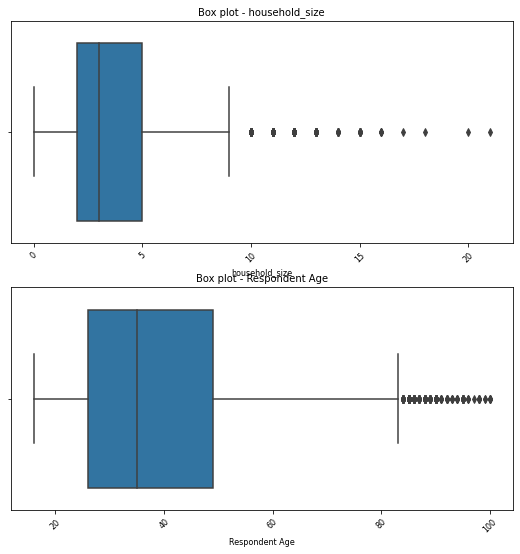

In [12]:
# Checking for Anomalies
# 
# Checking for outliers in the columns with numerical data
col_names = ['household_size','Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(9,9))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    labels = ax[i].get_xticklabels()
    plt.setp(labels, rotation=45, fontsize=8)
plt.show()

In [13]:
# let's remove the white spaces from the column names and replace them with an underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [14]:
# let's check for duplicates
df.duplicated().sum()

4371

## 5. Exploratory Analysis

## (i) Univariate Analysis

In [15]:
# let's generate a frequency table for the location column and the value counts
pd.crosstab(index=df.type_of_location, columns='count')

col_0,count
type_of_location,
Rural,14264
Urban,9079


> Most of the people with a bank account are from the rural areas.

In [16]:
# let's generate a frequency table for the people with a bank account
pd.crosstab(index=df.has_a_bank_account, columns='count')

col_0,count
has_a_bank_account,
No,20046
Yes,3297


> Most of the people do not have a bank account.

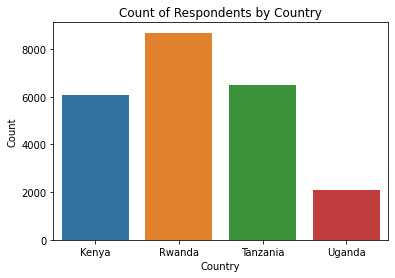

In [17]:
# let's plot a bar chart of the respondent country against the counts

# let's use seaborn to plot a bar chart
sns.countplot(x='country', data=df)

# label the x-axis
plt.xlabel('Country')

# label the y-axis
plt.ylabel('Count')

# let's give a title to our plot
plt.title('Count of Respondents by Country')

# let's show the plot
plt.show()

> Rwanda has the highest number of respondents and Uganda has the lowest number of respondents

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


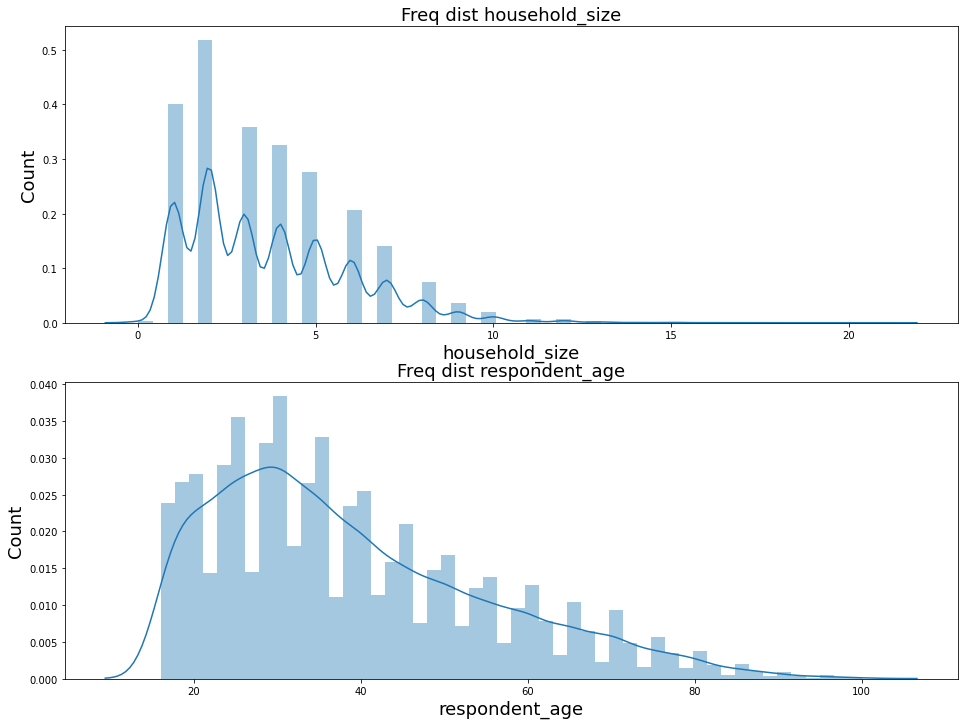

In [22]:
# Ploting the univariate summaries and recording our observations
# let's plot the univariate summaries using a distribution plot for year, household_size, and Respondent Age
col_names = ['household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=18)
    ax[i].set_xlabel(col_val, fontsize=18)
    ax[i].set_ylabel('Count', fontsize=18)

In [23]:
df.describe()

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


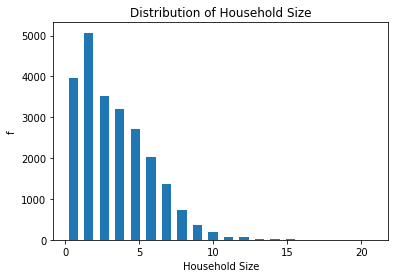

In [24]:
# let's create a histogram showing the distribution of the Respondent Age
h1 = df['household_size']
plt.hist(h1, bins=20, histtype='bar', rwidth=0.6)
plt.xlabel('Household Size')
plt.ylabel('f')
plt.title('Distribution of Household Size')
plt.show()

> the histogram shows that the average household size is between 2 and 4 
> people and its skewed to the right. The mean is 2.5 and the standard deviation is 0.8.

Text(0.5, 1.0, 'Count of Respondents by Type of Job')

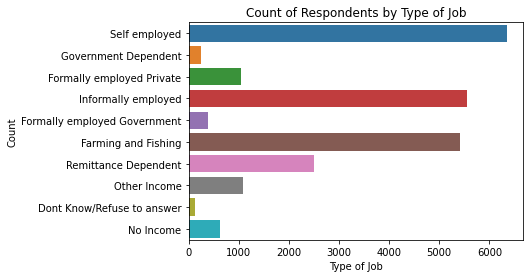

In [26]:
# A bar chart of the respondent's job type
# let's use seaborn to plot a bar chart
sns.countplot(y='type_of_job', data=df)

# label the x-axis
plt.xlabel('Type of Job')

# label the y-axis
plt.ylabel('Count')

# let's give a title to our plot
plt.title('Count of Respondents by Type of Job')

> The bar graph shows that a majority of the respondents are self employed, informally employed or are into farming and fishing

In [27]:
# let's determine the kurtoisis of the Respondent Age and household size
print(df['respondent_age'].kurt())
print(df['household_size'].kurt())

0.09844652254807196
1.1538690689335573


> The kurtosis of age is 3.5 and the kurtosis of household size is 2.5. 
> This means that the distribution of the Respondent Age is not normal.

## (i) Bivariate and Multivariate Analysis 

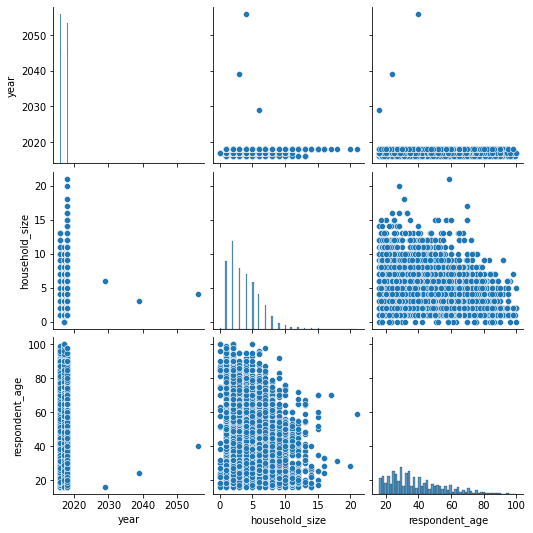

In [28]:
# let's plot bivariate summaries of our data
sns.pairplot(df)
plt.show()

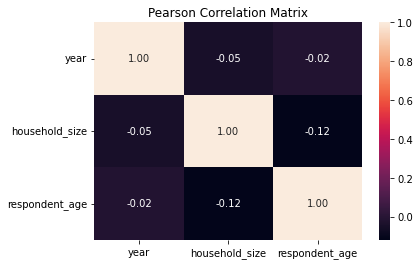

In [29]:
# let's calculate the pearon coefficient
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

> From the heatmap above we can see that there is a weak and negative correlation between the variables in the dataset

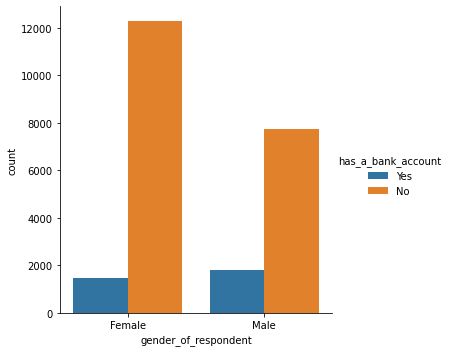

In [30]:
# let's plot a graph that shows whether a respondent has a bank account or not and the gender
sns.catplot(x='gender_of_respondent', kind='count', hue='has_a_bank_account', data=df)

> From the catplot above, it is evident that from the dataset, men are more likely to have a bank account than women

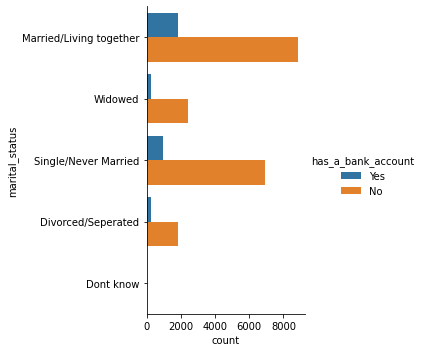

In [31]:
# let's check whether a person's marital status affects his/her decision to have a bank account
sns.catplot(y='marital_status', kind='count', hue='has_a_bank_account', data=df)

> People who are married or who are living together are more likely to have a bank account as observed above

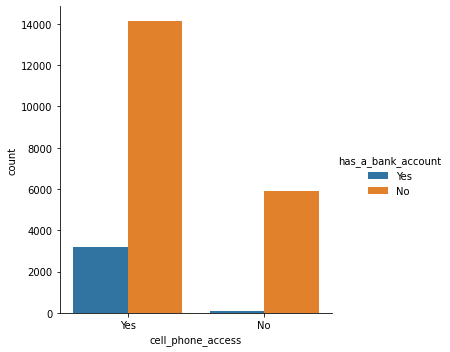

In [32]:
# let's see whether owning a cellphone affects the decision to have a bank account
sns.catplot(x='cell_phone_access', kind='count', hue='has_a_bank_account', data=df)

> The people who own cell phones from the data provided seem to have a bank account

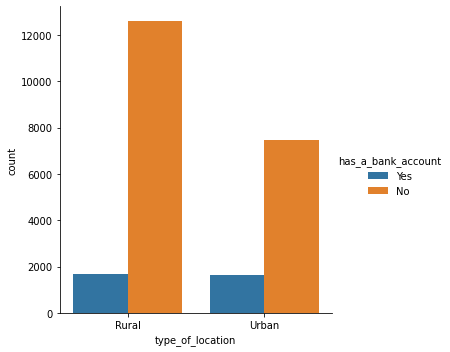

In [33]:
# let's see whether the type of location of a person affects the decision to have a bank account
sns.catplot(x='type_of_location', kind='count', hue='has_a_bank_account', data=df)

> Ownership of cell phones doesn't seem to be a factor as there is no difference in bank account ownership numbers for people in rural areas and those in urban areas

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

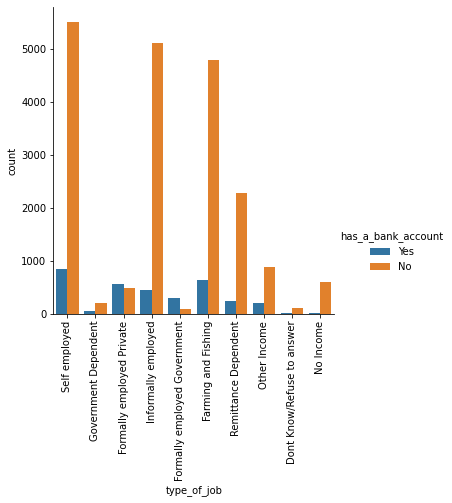

In [34]:
# let's see whether the type of job of a person affects the decision to have a bank account
sns.catplot(x='type_of_job', kind='count', hue='has_a_bank_account', data=df)
plt.xticks(rotation=90)


> Individuals with a source of income are more likely to have a bank account as compared to those who don't

## Reduction Techniques Applied

> We evidently have several variables from the plots above, it is therefore important to reduce the number of variables to two or three significant ones without loosing essence of the collected data.


> The Principal Component Analysis(PCA), is a statistical technique used to convert dimensional data into low dimensional data by selecting the most important features that capture as much information from the dataset as possible. The features used are selected on the basis of the variance that they cause in the output. The feature that causes the highest variance becomes the first principal component and the one that is responsible for the second highest variance becomes the second principal component and so on. Principal components DO NOT have any correlation with each other.


> The Principal Component Analysis can only be applied to numeric features. The categorical features therefore should be converted into numerical features before applying PCA.

In [105]:
# STEP 1: PREPROCESSING
# Let's divide the dataset into a feature set: X, where we will drop all
# non numerical data and corresponding labels: y

X = df.drop(columns=['country', 
'has_a_bank_account', 
'type_of_location', 
'cell_phone_access', 
'household_size', 
'type_of_job', 
'marital_status', 
'respondent_age',
'gender_of_respondent',
'level_of_educuation',
'the_relathip_with_head'], axis = 1)

y = df['has_a_bank_account']

In [106]:
# STEP 2: 
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
# STEP 3: NORMALIZATION
# PCA works best with a normalized feature set
# We will perform standard scalar normalization to normalize our feeature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
# Step 4: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [109]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.])

In [110]:
# Step 6: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [111]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [112]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4036 out of 4668 instances, 
# resulting in 86.46% accuracy.

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


## Follow up Questions

### (i) Did we have the right data?

> Yes we did. 

> The dataset contains crucial information from the respondents and we can use it to predict whether a person has a bank account or not.

> We also have more information about the respondents  including their age, their country, whether or not they have access to cell phones and their marital status amongst others that we use to make predictions.

> All the data provided assisted in determining whether an individual has a bank account or not.

### (ii) Do we need other data to answer our question?

> Yes we do.

> We could use some more information specifically on why some of the respondents do not have bank accounts as it would help the financial institutions  address the mentioned issues to attract more individuals to open bank accounts.

> 

### (iii) Did we have the right question?

> Yes we did.

> The question satisfies the requirements. It was also supported by the data provided.

## Conclusion

> The factors mentioned bellow can be used to predict whether an individual is likely to have a bank account:

1. Marital Status
2. Education Level
3. The type of job
4. Access to a cell phone